# Netflix Dataset Exploratory Data Analysis

## Objectives
Quick exploratory overview of the Netflix dataset to understand:

- Basic dataset structure and data quality
- High-level distribution patterns in key variables
- Content type breakdown (Movies vs TV Shows)
- General trends to inform detailed hypothesis testing

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Change to parent directory to access data folder
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
print(f"Working directory: {os.getcwd()}")

# Load the cleaned dataset
df = pd.read_csv('data/netflix_with_features.csv')

# Show top 5 rows to verify the load
df.head()

Working directory: c:\Users\Student\Downloads\DET\Practice PBI\Power BI\Netflix-Movies-and-TV-Shows-


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,has_multiple_countries,duration_mins,duration_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,False,90.0,Standard
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,False,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,False,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,False,NaN,NaN
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,False,NaN,NaN


In [3]:
# Show data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   show_id                 8807 non-null   object 
 1   type                    8807 non-null   object 
 2   title                   8807 non-null   object 
 3   director                8807 non-null   object 
 4   cast                    8807 non-null   object 
 5   country                 8807 non-null   object 
 6   date_added              8709 non-null   object 
 7   release_year            8807 non-null   int64  
 8   rating                  8807 non-null   object 
 9   duration                8804 non-null   object 
 10  listed_in               8807 non-null   object 
 11  description             8807 non-null   object 
 12  year_added              8709 non-null   float64
 13  month_added             8709 non-null   float64
 14  has_multiple_countries  8807 non-null   

Numeric columns found: ['release_year', 'year_added', 'month_added', 'duration_mins']


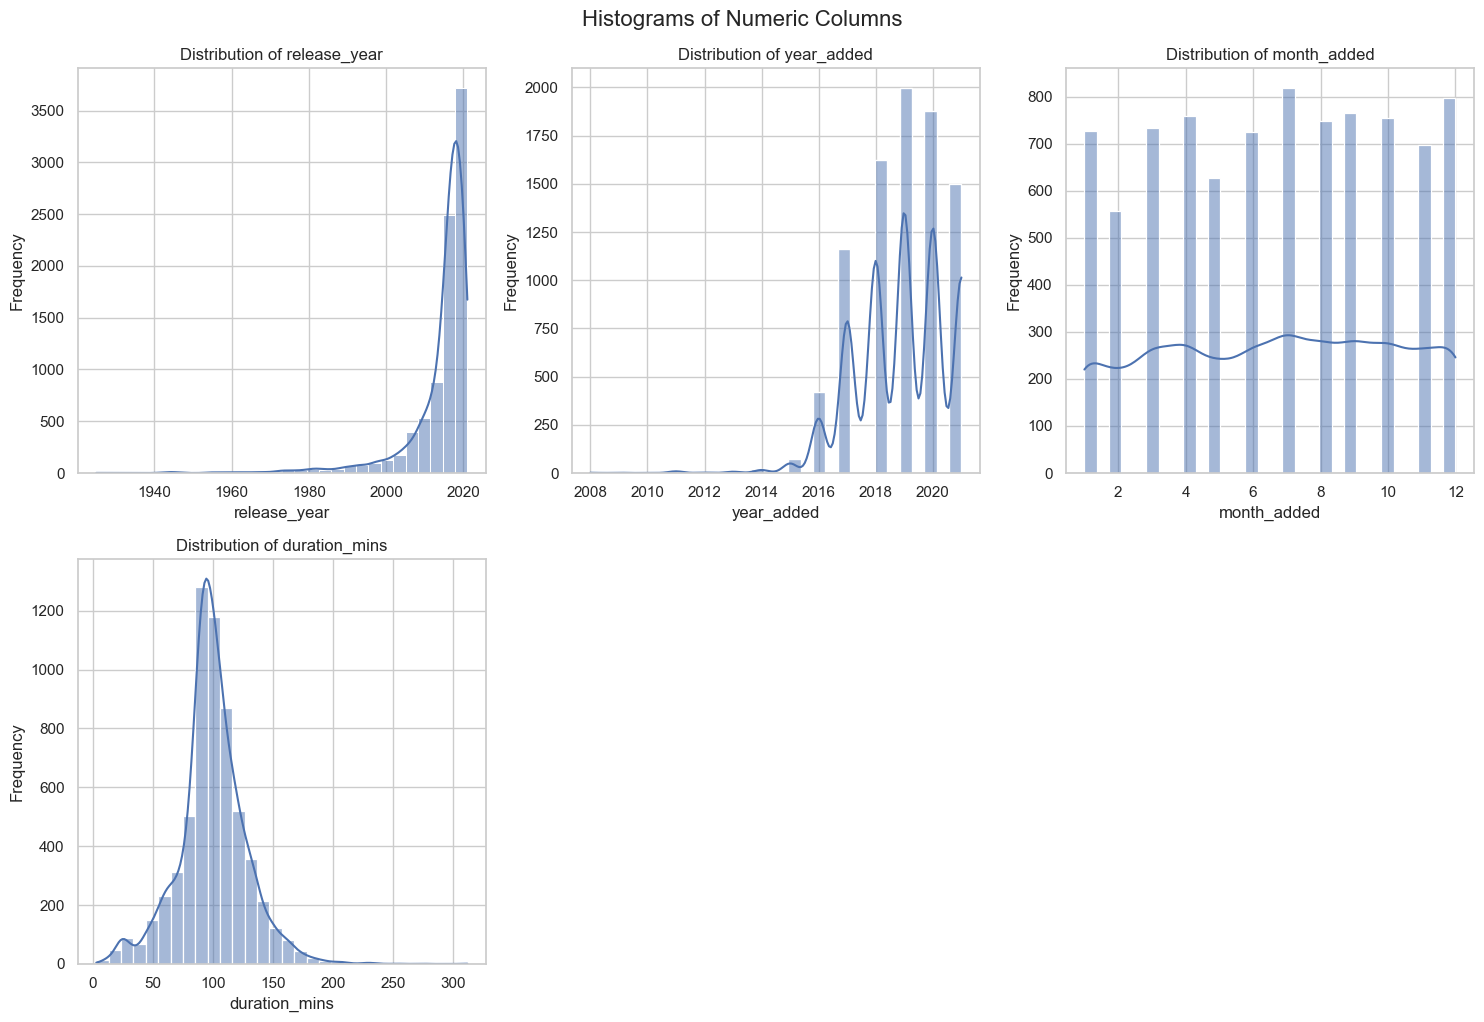

In [ ]:
# Basic dataset overview
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric columns: {list(numeric_cols)}")
print(f"Dataset shape: {df.shape}")
print(f"Release year range: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")
print(f"Netflix additions: {df['year_added'].min():.0f} - {df['year_added'].max():.0f}")

=== CATEGORICAL VARIABLES ANALYSIS ===

Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Percentages:
Movie: 69.6%
TV Show: 30.4%

Top 10 Content Ratings:
rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


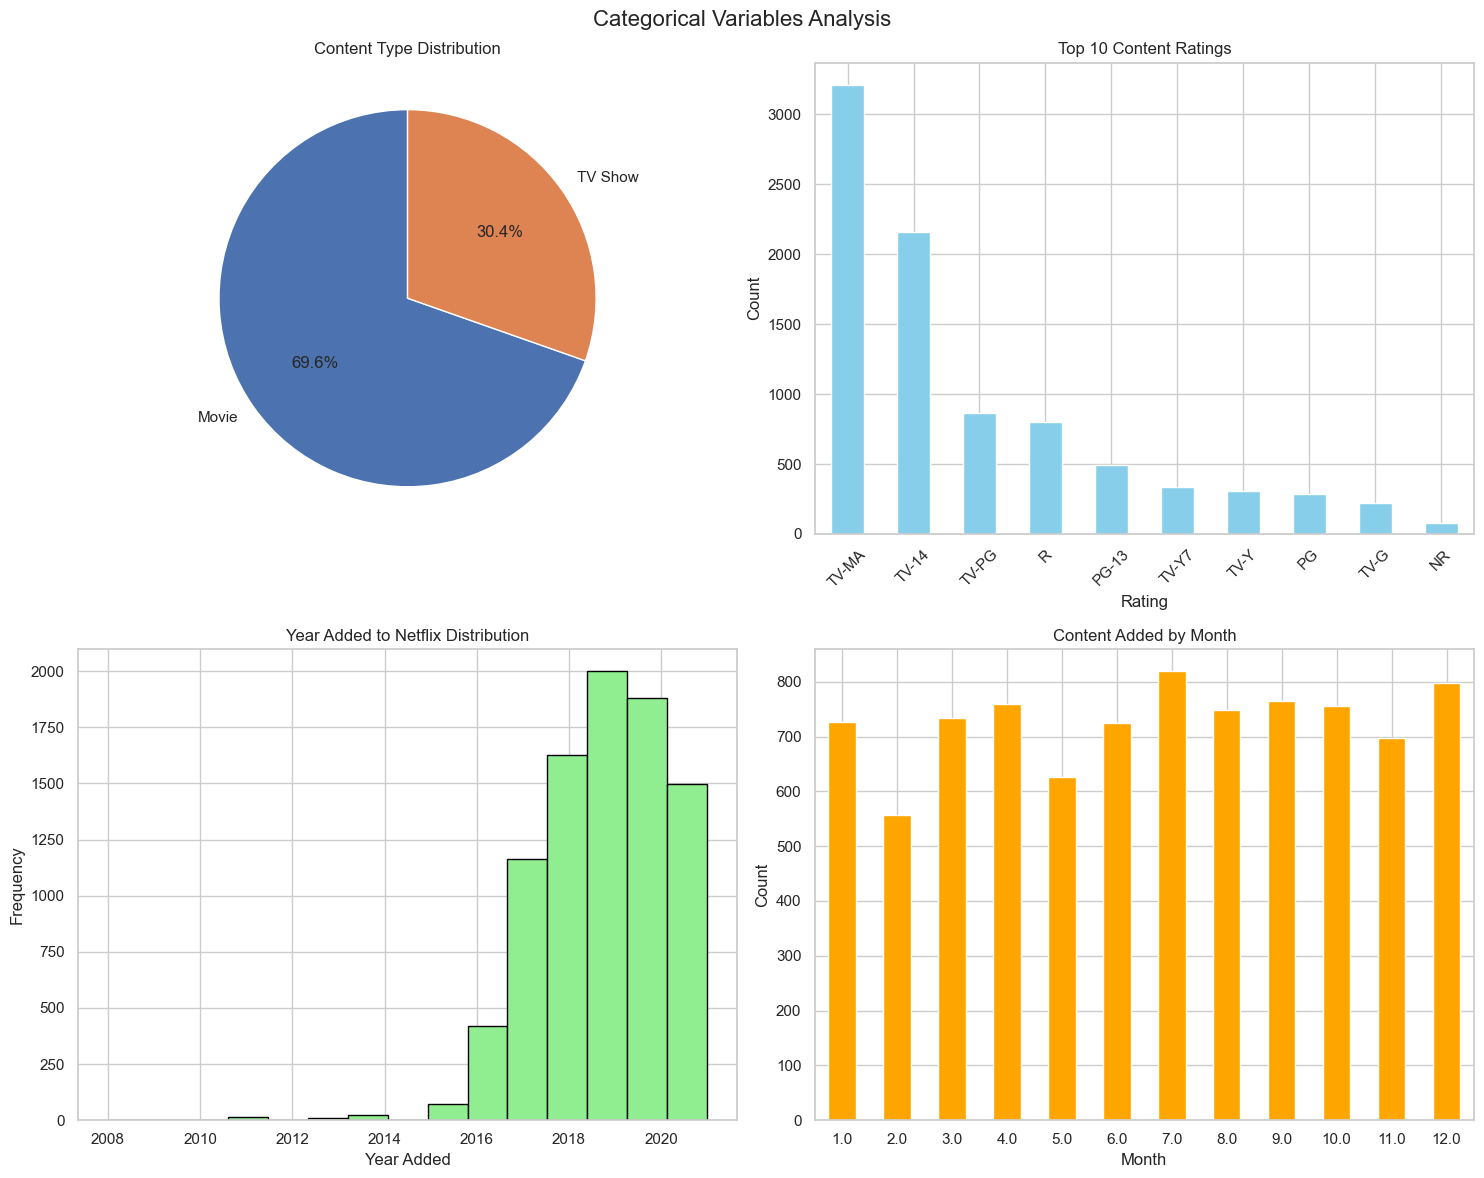

In [ ]:
# Content type overview
print("=== CONTENT TYPE BREAKDOWN ===")

type_counts = df['type'].value_counts()
print(f"\nContent Distribution:")
for content_type, count in type_counts.items():
    print(f"{content_type}: {count:,} ({count/len(df)*100:.1f}%)")

# Simple pie chart only
plt.figure(figsize=(6, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows Distribution')
plt.ylabel('')
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Student\AppData\Local\Temp\ipykernel_2472\2047238407.py:6: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_mins'] = movies_df['duration'].str.extract('(\d+)').astype(float)


=== MOVIE DURATION ANALYSIS ===
Total movies: 6,131
Duration statistics:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_mins, dtype: float64


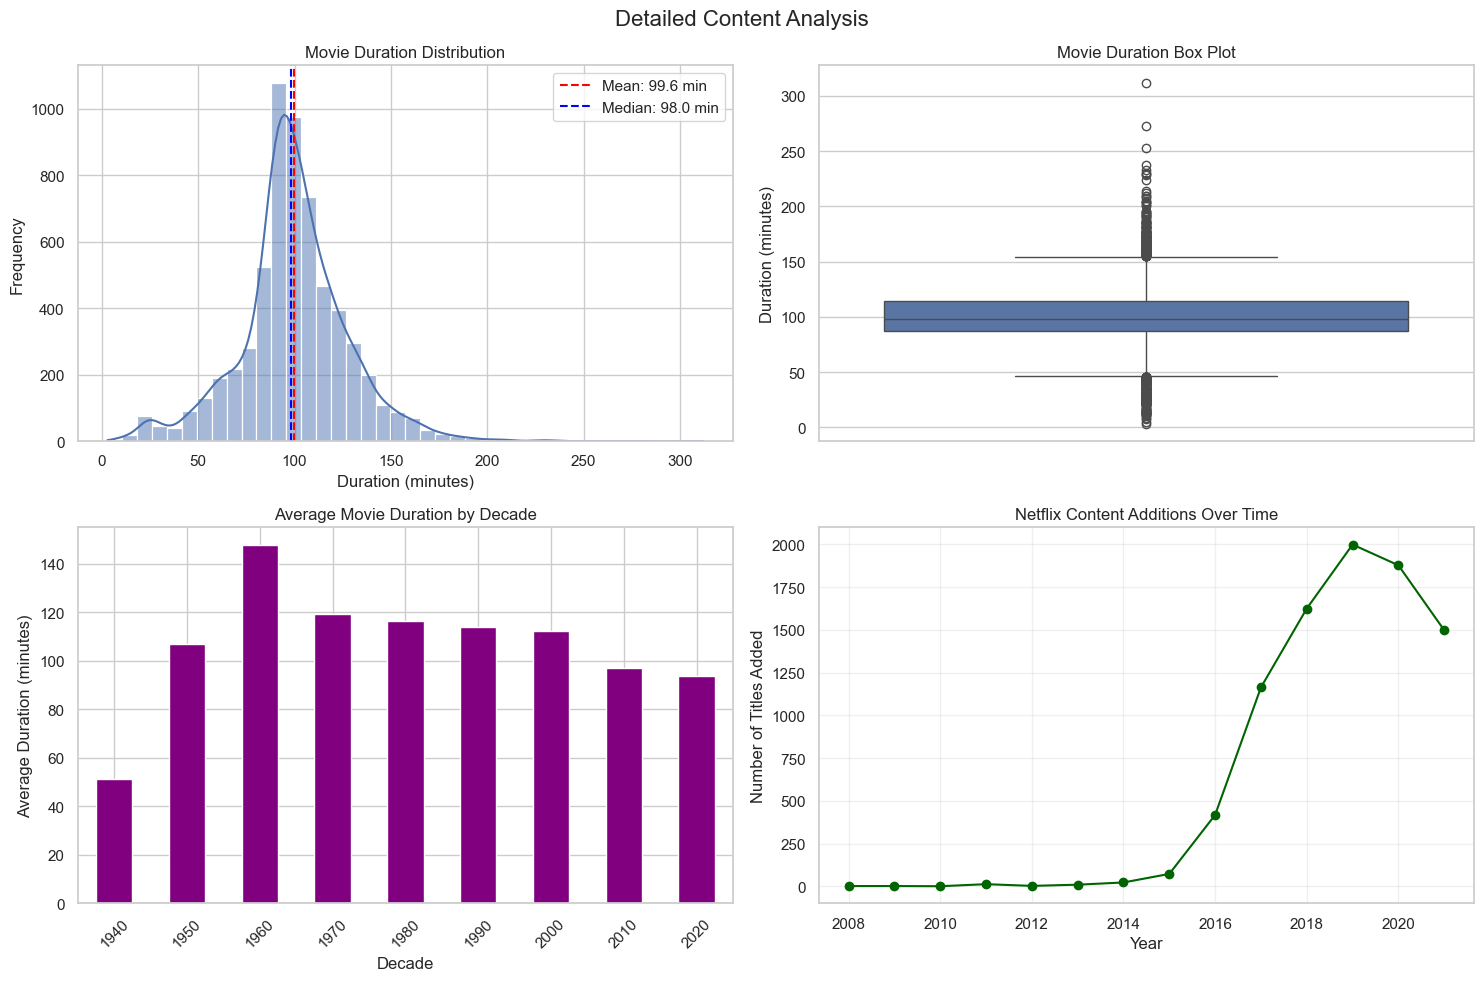

In [ ]:
# Basic movie duration facts
movies_df = df[df['type'] == 'Movie'].copy()

if len(movies_df) > 0:
    movies_df['duration_mins'] = movies_df['duration'].str.extract('(\d+)').astype(float)
    
    print("=== MOVIE DURATION FACTS ===")
    print(f"Total movies: {len(movies_df):,}")
    print(f"Average duration: {movies_df['duration_mins'].mean():.0f} minutes")
    print(f"Duration range: {movies_df['duration_mins'].min():.0f} - {movies_df['duration_mins'].max():.0f} minutes")
else:
    print("No movies found in dataset")

=== COUNTRIES AND GENRES ANALYSIS ===

Top 15 Countries by Content Count:
United States       : 4521 titles ( 51.3%)
India               : 1046 titles ( 11.9%)
United Kingdom      :  806 titles (  9.2%)
Canada              :  445 titles (  5.1%)
France              :  393 titles (  4.5%)
Japan               :  318 titles (  3.6%)
Spain               :  232 titles (  2.6%)
South Korea         :  231 titles (  2.6%)
Germany             :  226 titles (  2.6%)
Mexico              :  169 titles (  1.9%)
China               :  162 titles (  1.8%)
Australia           :  160 titles (  1.8%)
Egypt               :  117 titles (  1.3%)
Turkey              :  113 titles (  1.3%)
Hong Kong           :  105 titles (  1.2%)

Top 15 Genres by Frequency:
International Movies          : 2752 titles ( 31.2%)
Dramas                        : 2427 titles ( 27.6%)
Comedies                      : 1674 titles ( 19.0%)
International TV Shows        : 1351 titles ( 15.3%)
Documentaries                 :  869 tit

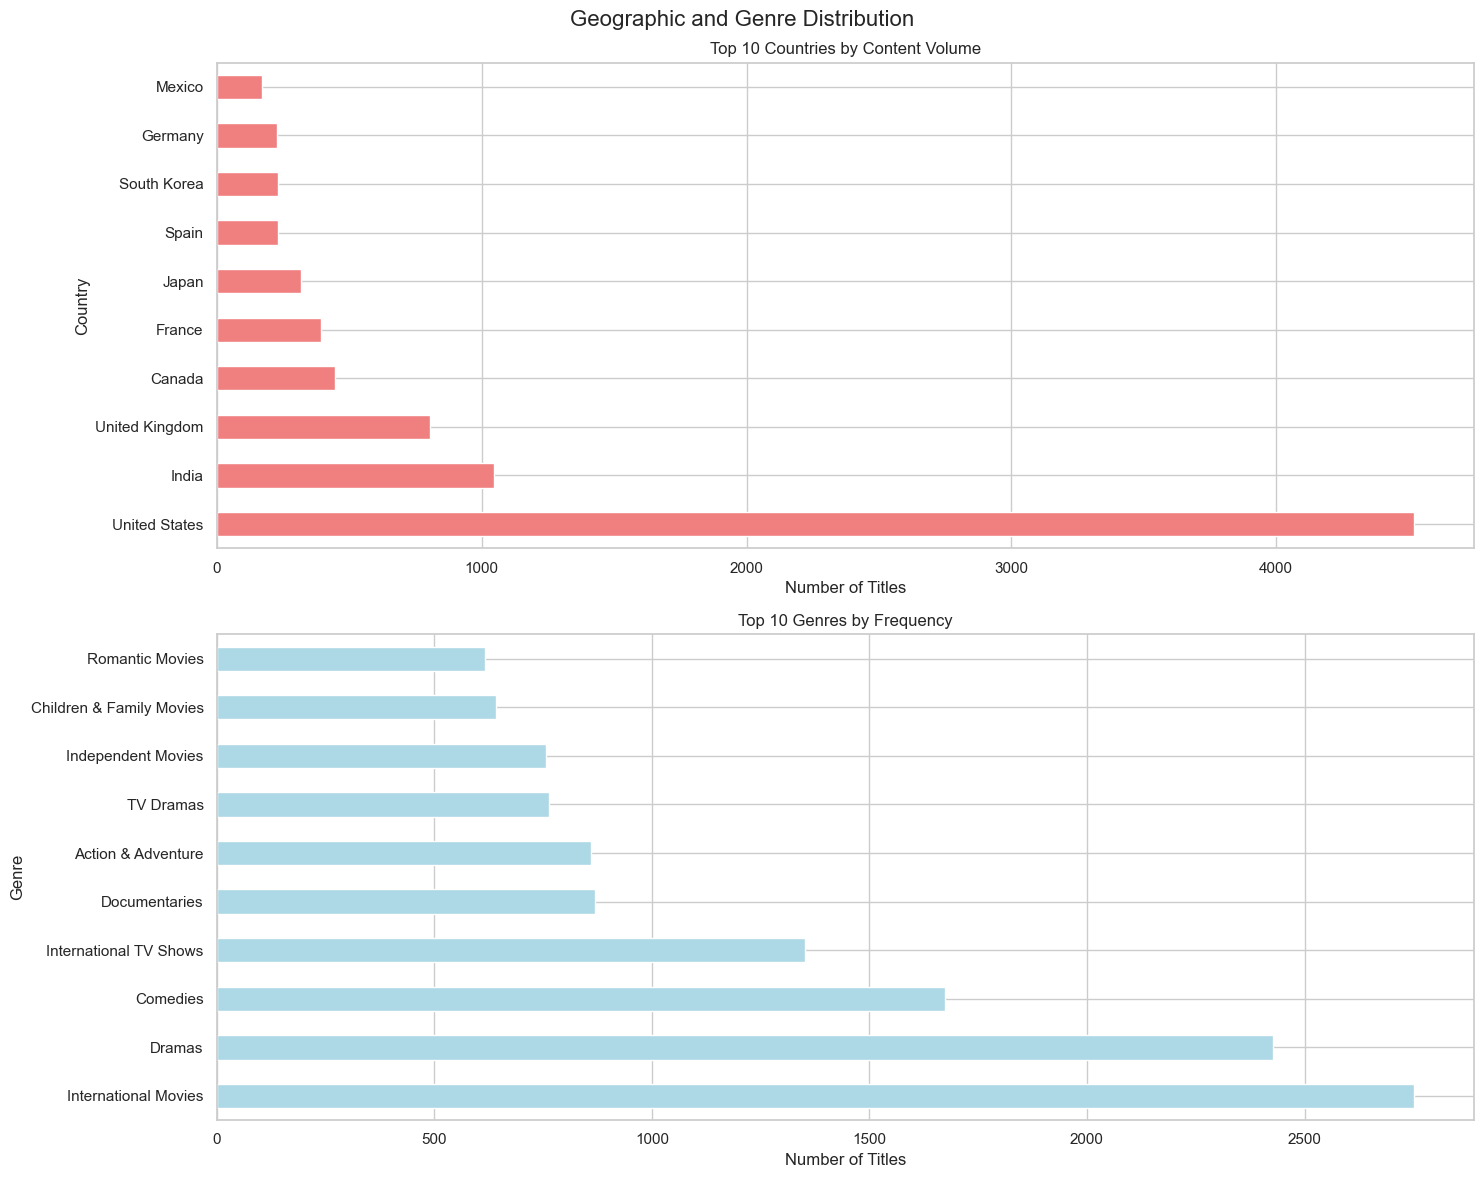

In [ ]:
# Top countries and genres overview
print("=== TOP COUNTRIES & GENRES ===")

# Top 5 countries
country_counts = {}
for idx, row in df.iterrows():
    if pd.notna(row['country']):
        countries = [country.strip() for country in row['country'].split(',')]
        for country in countries:
            country_counts[country] = country_counts.get(country, 0) + 1

top_countries = pd.Series(country_counts).sort_values(ascending=False).head(5)
print(f"\nTop 5 Countries:")
for country, count in top_countries.items():
    print(f"• {country}: {count:,} titles")

# Top 5 genres
genre_counts = {}
for idx, row in df.iterrows():
    if pd.notna(row['listed_in']):
        genres = [genre.strip() for genre in row['listed_in'].split(',')]
        for genre in genres:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1

top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(5)
print(f"\nTop 5 Genres:")
for genre, count in top_genres.items():
    print(f"• {genre}: {count:,} titles")

In [ ]:
# Summary of key findings
print("=== EDA SUMMARY ===")

print(f"\nDataset Facts:")
print(f"• Total titles: {len(df):,}")
print(f"• Movies: {len(df[df['type'] == 'Movie']):,}")
print(f"• TV Shows: {len(df[df['type'] == 'TV Show']):,}")
print(f"• Countries represented: {len(country_counts)}")
print(f"• Unique genres: {len(genre_counts)}")

print(f"\nKey Observations:")
print(f"• Content spans from {df['release_year'].min():.0f} to {df['release_year'].max():.0f}")
print(f"• Most content added between {df['year_added'].min():.0f}-{df['year_added'].max():.0f}")
print(f"• Top country: {top_countries.index[0]} ({top_countries.iloc[0]:,} titles)")
print(f"• Top genre: {top_genres.index[0]} ({top_genres.iloc[0]:,} titles)")

if len(movies_df) > 0:
    print(f"• Average movie length: {movies_df['duration_mins'].mean():.0f} minutes")

print(f"\nNext Steps:")
print(f"• Proceed to detailed hypothesis testing")
print(f"• Focus on temporal trends, geographic patterns, and content preferences")
print(f"• Use findings to guide dashboard development")

=== SUMMARY INSIGHTS ===

Dataset Overview:
• Total titles: 8,807
• Movies: 6,131
• TV Shows: 2,676
• Date range: 2008 - 2021
• Countries represented: 123
• Unique genres: 42

Key Patterns Identified:
• Most content added in: 2019.0 (1,999 titles)
• Peak month for additions: Month 7.0 (819 titles)
• Most represented country: United States (4,521 titles)
• Most common genre: International Movies (2,752 titles)
• Average movie duration: 99.6 minutes
• Most common movie duration range: 90-120 minutes

Data Quality Notes:
• date_added: 98 missing values (1.1%)
• duration: 3 missing values (0.0%)
• year_added: 98 missing values (1.1%)
• month_added: 98 missing values (1.1%)
• duration_mins: 2,679 missing values (30.4%)
• duration_category: 2,679 missing values (30.4%)

Recommendations for Dashboard Design:
• Focus on temporal trends (yearly/monthly content additions)
• Highlight geographic diversity with country-based filters
• Include genre-based analysis for content strategy insights
• Cr